# Chronic Kidney Disease Data Analysis

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_rows', None)

## Load data from csv file

In [6]:
df = pd.read_csv('chronic_kidney_disease.csv')

In [7]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## All the column names of the dataset

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

## Remove null values of all features and convert to integers

In [9]:
df = df.loc[df['bp'].notnull()]

In [10]:
df = df.loc[df['age'].notnull()]

In [11]:
df = df.loc[df['rbc'].notnull()]

In [12]:
df = df.loc[df['al'].notnull()]

In [13]:
df = df.loc[df['sg'].notnull()]

In [14]:
df = df.loc[df['pc'].notnull()]

In [15]:
df = df.loc[df['bu'].notnull()]

In [16]:
df = df.loc[df['pcc'].notnull()]

In [17]:
df = df.loc[df['ba'].notnull()]

In [18]:
df = df.loc[df['bgr'].notnull()]

In [19]:
df = df.loc[df['sc'].notnull()]

In [20]:
df = df.loc[df['sod'].notnull()]

In [21]:
df = df.loc[df['pot'].notnull()]

In [22]:
df = df.loc[df['hemo'].notnull()]

In [23]:
df = df.loc[df['pcv'].notnull()]

In [24]:
df = df.loc[df['wbcc'].notnull()]

In [25]:
df = df.loc[df['rbcc'].notnull()]

In [26]:
df = df.loc[df['htn'].notnull()]

In [27]:
df = df.loc[df['pe'].notnull()]

In [28]:
df = df.loc[df['cad'].notnull()]

In [29]:
df = df.loc[df['dm'].notnull()]

In [30]:
df = df.loc[df['appet'].notnull()]

In [31]:
df = df.loc[df['ane'].notnull()]

In [32]:
df['class']=df['class'].replace({'ckd\t':1, 'ckd':1, 'notckd':2})

In [33]:
df.rbc=df.rbc.map({"normal":0,"abnormal":1})

In [34]:
df.pc=df.pc.map({"normal":0,"abnormal":1})

In [35]:
df.pcc=df.pcc.map({"present":0,"notpresent":1})

In [36]:
df.ba=df.ba.map({"present":0,"notpresent":1})

In [37]:
df.htn=df.htn.map({"yes":1,"no":0})

In [38]:
df.dm=df.dm.map({"yes":1,"no":0})

In [39]:
df.cad=df.cad.map({"yes":1,"no":0})

In [40]:
df.ane=df.ane.map({"yes":1,"no":0})

In [41]:
df.pe=df.pe.map({"yes":1,"no":0})

In [42]:
df.appet=df.appet.map({"good":1,"poor":0})

In [43]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0,1,0,1,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,0,1,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,0,1,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,0,0,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,1,1,173.0,...,24,9200,3.2,1,1,1,0,1,1,1
22,48.0,80.0,1.025,4.0,0.0,0,1,1,1,95.0,...,32,6900,3.4,1,0,0,1,0,1,1
27,69.0,70.0,1.010,3.0,4.0,0,1,1,1,264.0,...,37,9600,4.1,1,1,1,1,1,0,1
48,73.0,70.0,1.005,0.0,0.0,0,0,1,1,70.0,...,29,18900,3.5,1,1,0,1,1,0,1
58,73.0,80.0,1.020,2.0,0.0,1,1,1,1,253.0,...,33,7200,4.3,1,1,1,1,0,0,1
71,46.0,60.0,1.010,1.0,0.0,0,0,1,1,163.0,...,28,14600,3.2,1,1,0,1,0,0,1


In [44]:
df['class']=df['class'].astype(int)

In [45]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0,1,0,1,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,1,1,0,1,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,1,1,0,1,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,0,1,0,0,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,1,1,1,1,173.0,...,24,9200,3.2,1,1,1,0,1,1,1
22,48.0,80.0,1.025,4.0,0.0,0,1,1,1,95.0,...,32,6900,3.4,1,0,0,1,0,1,1
27,69.0,70.0,1.010,3.0,4.0,0,1,1,1,264.0,...,37,9600,4.1,1,1,1,1,1,0,1
48,73.0,70.0,1.005,0.0,0.0,0,0,1,1,70.0,...,29,18900,3.5,1,1,0,1,1,0,1
58,73.0,80.0,1.020,2.0,0.0,1,1,1,1,253.0,...,33,7200,4.3,1,1,1,1,0,0,1
71,46.0,60.0,1.010,1.0,0.0,0,0,1,1,163.0,...,28,14600,3.2,1,1,0,1,0,0,1


### Train model for feature importance

In [46]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pickle

In [47]:
X=df.loc[:,["age", "bp", "rbc", "sg", "al", "pc", "pcc", "ba", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc", "htn", "dm", "cad", "appet", "pe", "ane"]]
Y=df.loc[:,["class"]]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
model = GradientBoostingClassifier()
model.fit(X_train, np.ravel(Y_train))


GradientBoostingClassifier()

### Test feature importance

In [57]:
importance = model.feature_importances_


### Importance of every feature 

In [55]:
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47091515e-03,
       5.74973143e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.85178659e-01, 1.00491095e-03,
       0.00000000e+00, 1.15421225e-03, 9.29562482e-04, 6.10247734e-04,
       2.79863440e-04, 1.24442120e-02, 4.91529100e-03, 0.00000000e+00,
       0.00000000e+00, 1.70389824e-02, 0.00000000e+00])

Text(0.5, 1.0, 'Feature Importance in CKD Prediction')

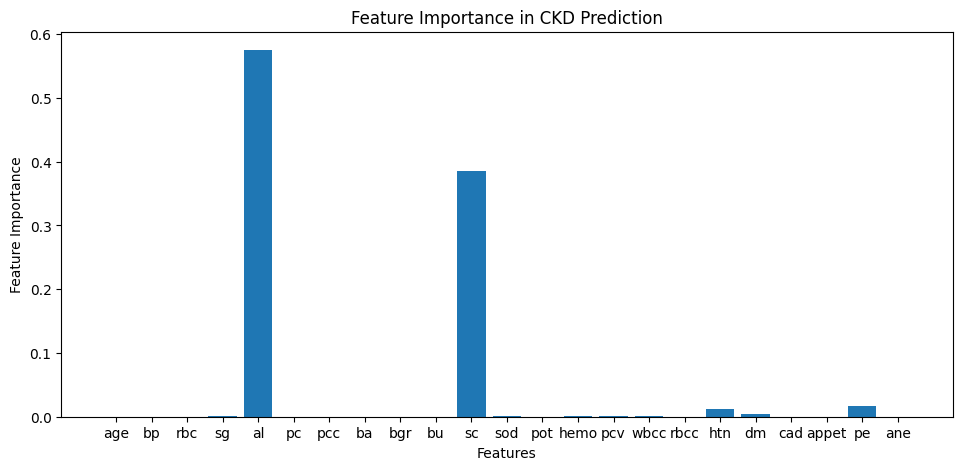

In [56]:
plt.figure(figsize=(11.5, 5))
plt.bar(X_train.columns, importance)
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.title("Feature Importance in CKD Prediction")